# **Veri setini ekliyoruz**

In [1]:
# Veri setini pandas kütüphanesi ile okuyoruz
import pandas as pd
df = pd.read_csv("/content/Telco-Customer-Churn.csv")

# **Görev 1: Keşifçi Veri Analizi**

In [2]:
# Adım 1: Numerik ve kategorik değişkenleri yakalayalım
numerik_degiskenler = df.select_dtypes(include=["int64", "float64"]).columns
kategorik_degiskenler = df.select_dtypes(include=["object"]).columns
print(numerik_degiskenler)
print(kategorik_degiskenler)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [3]:
# Adım 2: Gerekli düzenlemeleri yapalım
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

numerik_degiskenler = df.select_dtypes(include=["int64", "float64"]).columns
kategorik_degiskenler = df.select_dtypes(include=["object"]).columns
print(numerik_degiskenler)
print(kategorik_degiskenler)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [4]:
# Adım 3: Numerik ve kategorik değişkenlerin veri içindeki dağılımını gözlemleyelim
print(df[numerik_degiskenler].describe())
for degisken in kategorik_degiskenler:
    print(df[degisken].value_counts())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneServ

In [5]:
# Adım 4: Kategorik değişkenler ile hedef değişken incelemesini yapalım
for degisken in kategorik_degiskenler:
    print(pd.crosstab(df[degisken], df["Churn"], normalize="index"))


Churn        No  Yes
customerID          
0002-ORFBO  1.0  0.0
0003-MKNFE  1.0  0.0
0004-TLHLJ  0.0  1.0
0011-IGKFF  0.0  1.0
0013-EXCHZ  0.0  1.0
...         ...  ...
9987-LUTYD  1.0  0.0
9992-RRAMN  0.0  1.0
9992-UJOEL  1.0  0.0
9993-LHIEB  1.0  0.0
9995-HOTOH  1.0  0.0

[7043 rows x 2 columns]
Churn         No       Yes
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603
Churn          No       Yes
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649
Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502
Churn               No       Yes
PhoneService                    
No            0.750733  0.249267
Yes           0.732904  0.267096
Churn                   No       Yes
MultipleLines                       
No                0.749558  0.250442
No phone service  0.750733  0.249267
Yes               0.713901  0.286099
Churn                  No       Yes
Inter

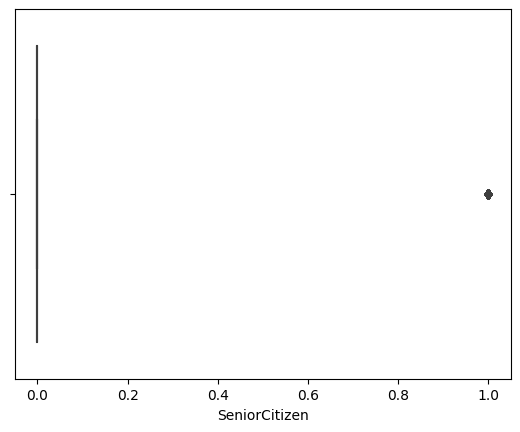

Aykırı gözlem sayısı: 0


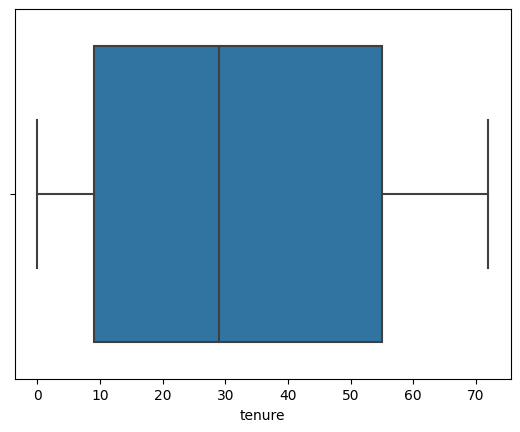

Aykırı gözlem sayısı: 0


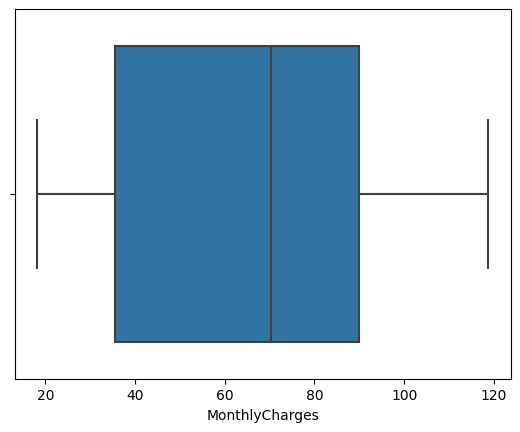

Aykırı gözlem sayısı: 0


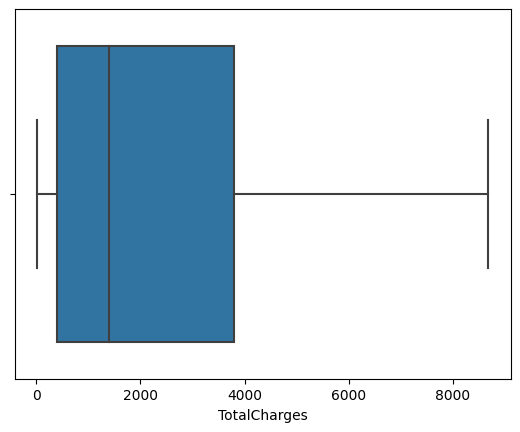

Aykırı gözlem sayısı: 0


In [6]:
# Adım 5: Aykırı gözlem var mı inceleyelim
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

for degisken in numerik_degiskenler:
    sns.boxplot(x=df[degisken])
    plt.show()
    print("Aykırı gözlem sayısı:", sum((zscore(df[degisken]) < -3) | (zscore(df[degisken]) > 3)))

In [7]:
# Adım 6: Eksik gözlem var mı inceleyelim
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


# **Görev 2: Feature Engineering**

In [8]:
# Adım 1: Eksik ve aykırı gözlemler için gerekli işlemleri yapalım
for degisken in numerik_degiskenler:
    df[degisken].fillna(df[degisken].median(), inplace=True)
    q1 = df[degisken].quantile(0.25)
    q3 = df[degisken].quantile(0.75)
    iqr = q3 - q1
    alt_sinir = q1 - 1.5 * iqr
    ust_sinir = q3 + 1.5 * iqr
    df.loc[df[degisken] < alt_sinir, degisken] = alt_sinir
    df.loc[df[degisken] > ust_sinir, degisken] = ust_sinir

In [9]:
# Adım 2: Yeni değişkenler oluşturalım
df["MonthlyCharges"] = df["TotalCharges"] / df["tenure"]

In [10]:
# Adım 3: Encoding işlemlerini gerçekleştirelim
df = pd.get_dummies(df, columns=kategorik_degiskenler, drop_first=True)

In [11]:
# Adım 4: Numerik değişkenler için standartlaştırma yapalım
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerik_degiskenler] = scaler.fit_transform(df[numerik_degiskenler])


ValueError: ignored

In [12]:
for degisken in numerik_degiskenler:
    q1 = df[degisken].quantile(0.25)
    q3 = df[degisken].quantile(0.75)
    iqr = q3 - q1
    alt_sinir = q1 - 1.5 * iqr
    ust_sinir = q3 + 1.5 * iqr
    df[degisken] = df[degisken].clip(alt_sinir, ust_sinir)  # Aykırı değerleri sınırla

scaler = StandardScaler()
df[numerik_degiskenler] = scaler.fit_transform(df[numerik_degiskenler])


In [13]:
# Adım 4: Numerik değişkenler için standartlaştırma yapalım
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerik_degiskenler] = scaler.fit_transform(df[numerik_degiskenler])


#  **Görev 3: Modelleme**


In [14]:
# Adım 1: Sınıflandırma algoritmaları ile modeller kurup, accuracy skorlarını inceleyip. En iyi 4 modeli seçelim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [15]:
X = df.drop("Churn_Yes", axis=1)
y = df["Churn_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

accuracy_scores = {}
accuracy_scores["Logistic Regression"] = accuracy_score(y_test, y_pred_log_reg)
accuracy_scores["KNN"] = accuracy_score(y_test, y_pred_knn)
accuracy_scores["Decision Tree"] = accuracy_score(y_test, y_pred_dt)
accuracy_scores["Random Forest"] = accuracy_score(y_test, y_pred_rf)

accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1], reverse=True)

print("Accuracy skorları:")
for model, score in accuracy_scores:
    print(model, ":", score)

best_4_models = [model for model, score in accuracy_scores[:4]]
print("En iyi 4 model:")
print(best_4_models)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy skorları:
Logistic Regression : 0.8197303051809794
Random Forest : 0.794180269694819
KNN : 0.7856635911994322
Decision Tree : 0.7735982966643009
En iyi 4 model:
['Logistic Regression', 'Random Forest', 'KNN', 'Decision Tree']
